# Subway Data

Here are some potential questions about the subway data:

* What variables are related to subway ridership?
  * Which stations have the most riders?
  * What are the ridership patterns over time?
  * How does the weather affect ridership?
* What patterns can I find in the weather?
  * Is the temperature rising throughout the month?
  * How does the weather vary across the city?

# Two-Dimensional NumPy Arrays

In [1]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

Accessing elements

In [2]:
print ridership[1, 3]
print ridership[1:3, 3:5]
print ridership[1, :]

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


Vectorized operations on rows or columns

In [3]:
print ridership[0, :] + ridership[1, :]
print ridership[:, 0] + ridership[:, 1]

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


Vectorized operations on entire arrays

In [4]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print a + b

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


If I wanted to access the first day of data:

In [5]:
print ridership[0, :]
print ridership[0, ]
print ridership[0]

[0 0 2 5 0]
[0 0 2 5 0]
[0 0 2 5 0]


This will return the maximum value for that row:

In [6]:
print ridership[0, :].max()

5


If I want the station that had the max number of riders, I need the column that contained the max value, so use `argmax()`:

In [7]:
max_station = ridership[0, :].argmax()
print max_station 

3


Now we can get the ridership for that station by asking for that column of data:

In [8]:
print ridership[:, max_station]
mean_for_max = ridership[:, max_station].mean()

[   5 2328 6461 4787 4477 4979  496   27 4174 4665]


Fill in this function to find the station with the maximum riders on the first day, then return the mean riders per day for that station. Also return the mean ridership overall for comparsion.

Hint: NumPy's `argmax()` function might be useful:
http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

In [9]:
def mean_riders_for_max_station(ridership):
    overall_mean = ridership.mean()
    mean_for_max = ridership[:, max_station].mean()
    return (overall_mean, mean_for_max)
    
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

# NumPy Axis

Axis `0` is vertical, `1` is horizontal:

In [10]:
# NumPy axis argument
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print a.sum()
print a.sum(axis=0) # vertical
print a.sum(axis=1) # horizontal

45
[12 15 18]
[ 6 15 24]


In [11]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

Fill in this function. First, for each subway station, calculate the mean ridership per day. Then, out of all the subway stations, return the maximum and minimum of these values. That is, find the maximum mean-ridership-per-day and the minimum mean-ridership-per-day for any subway station.

In [12]:
def min_and_max_riders_per_day(ridership):
    station_riders = ridership.mean(axis=0)
    min_daily_ridership = station_riders.min()
    max_daily_ridership = station_riders.max()
    return (max_daily_ridership, min_daily_ridership)

In [13]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

# Accessing Elements of a DataFrame

In [14]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [15]:
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


Use `.loc` to access individual rows by their indexes:

In [16]:
ridership_df.loc['05-02-11']

R003    1478
R004    3877
R005    3674
R006    2328
R007    2539
Name: 05-02-11, dtype: int64

Use `.iloc` to access a row by its position:

In [17]:
ridership_df.iloc[1]

R003    1478
R004    3877
R005    3674
R006    2328
R007    2539
Name: 05-02-11, dtype: int64

In [18]:
ridership_df.iloc[-1]

R003    1342
R004    4043
R005    4009
R006    4665
R007    3033
Name: 05-10-11, dtype: int64

In [19]:
ridership_df.iloc[0:2]

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539


You can use this format with `.iloc` to get an individual element:

In [20]:
ridership_df.iloc[0,3]

5

You can use `.loc` to get an individual row and column element:

In [21]:
ridership_df.loc['05-04-11', 'R004']

3392

You can access whole columns using square brackets:

In [22]:
ridership_df['R006']

05-01-11       5
05-02-11    2328
05-03-11    6461
05-04-11    4787
05-05-11    4477
05-06-11    4979
05-07-11     496
05-08-11      27
05-09-11    4174
05-10-11    4665
Name: R006, dtype: int64

You can use `.values` to get a 2D NumPy array:

In [23]:
ridership_df.values

array([[   0,    0,    2,    5,    0],
       [1478, 3877, 3674, 2328, 2539],
       [1613, 4088, 3991, 6461, 2691],
       [1560, 3392, 3826, 4787, 2613],
       [1608, 4802, 3932, 4477, 2705],
       [1576, 3933, 3909, 4979, 2685],
       [  95,  229,  255,  496,  201],
       [   2,    0,    1,   27,    0],
       [1438, 3785, 3589, 4174, 2215],
       [1342, 4043, 4009, 4665, 3033]])

DataFrame creation:

In [24]:
# You can create a DataFrame out of a dictionary mapping column names to values
df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print df_1

   A  B
0  0  3
1  1  4
2  2  5


In [25]:
# You can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
print df_2

   A  B  C
0  0  1  2
1  3  4  5


Accessing elements:

In [26]:
print ridership_df.iloc[0]
print ridership_df.loc['05-05-11']
print ridership_df['R003']
print ridership_df.iloc[1, 3]

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64
R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64
2328


Accessing multiple rows:

In [27]:
print ridership_df.iloc[1:4]

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613


Accessing multiple columns:

In [28]:
print ridership_df[['R003', 'R005']]

          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


Pandas axis:

In [29]:
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print df.sum()
print df.sum(axis=1)
print df.values.sum()

A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


Fill in this function to find the station with the maximum riders on the first day, then return the mean riders per day for that station. Also return the mean ridership overall for comparsion.

This is the same as a previous exercise, but this time the input is a Pandas DataFrame rather than a 2D NumPy array.

In [30]:
def mean_riders_for_max_station(ridership):
    # Find the station with the most riders on the first day
    max_station = ridership_df.iloc[0].idxmax()
    mean_for_max = ridership[max_station].mean()
    overall_mean = ridership.values.mean()
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

# Loading Data into a DataFrame

In [31]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [32]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [33]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


Fill in this function to compute the correlation between the two input variables. Each input is either a NumPy array or a Pandas Series.
    
> correlation = average of (x in standard units) times (y in standard units)
    
Remember to pass the argument `"ddof=0"` to the Pandas `std()` function!

# Calculating Correlation

In [34]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    return (std_x * std_y).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)

print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


You can also use the NumPy `corrcoef()` method to do this, but I'm not sure of the syntax:

In [35]:
def correlation2(x, y):
    return np.corrcoef(x, y)

correlation2(entries, rain)

array([[ 1.        ,  0.03564852],
       [ 0.03564852,  1.        ]])

# Pandas Axis Names

In [36]:
df = pd.DataFrame(
    data=[
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ]
)

print df

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9


Taking the mean with `axis="columns"` means you are taking the mean _along_ the columns, i.e. left-to-right:

In [37]:
df.mean(axis='columns')

0    2
1    5
2    8
dtype: float64

Taking the mean with `axis="index"` means you are taking the mean _along_ the index, i.e. top-to-bottom:

In [38]:
df.mean(axis='index')

0    4
1    5
2    6
dtype: float64

# DataFrame Vectorized Operations

Adding DataFrames with the column names

In [39]:
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
print df1 + df2

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


Adding DataFrames with overlapping column names 

In [40]:
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
print df1 + df2

    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN


Adding DataFrames with overlapping row indexes

In [41]:
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
print df1 + df2

       a   b   c
row1 NaN NaN NaN
row2  32  65  98
row3  23  56  89
row4 NaN NaN NaN


In [42]:
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

Fill in this function to take a DataFrame with cumulative entries and exits (entries in the first column, exits in the second) and return a DataFrame with hourly entries and exits (entries in the first column, exits in the second).

In [43]:
def get_hourly_entries_and_exits(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23,8
2,18,18
3,71,54
4,170,44
5,214,42
6,87,11
7,10,3
8,36,89
9,153,333


# DataFrame applymap()

DataFrame `applymap()`:

In [44]:
df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [10, 20, 30],
    'c': [5, 10, 15]
})

def add_one(x):
    return x + 1

print df.applymap(add_one)

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [45]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

Fill in this function to convert the given DataFrame of numerical grades to letter grades. Return a new DataFrame with the converted grade.
    
The conversion rule is:
- 90-100 -> A
- 80-89  -> B
- 70-79  -> C
- 60-69  -> D
- 0-59   -> F

In [46]:
def convert_grade(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'

def convert_grades(grades):
    return grades.applymap(convert_grade)

In [47]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


# DataFrame apply()

In [48]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

Demonstration of DataFrame `apply()`:

In [49]:
def convert_grades_curve(exam_grades):
    # Pandas has a bult-in function that will perform this calculation
    # This will give the bottom 0% to 10% of students the grade 'F',
    # 10% to 20% the grade 'D', and so on. You can read more about
    # the qcut() function here:
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    return pd.qcut(exam_grades,
                   [0, 0.1, 0.2, 0.5, 0.8, 1],
                   labels=['F', 'D', 'C', 'B', 'A'])
        
# qcut() operates on a list, array, or Series. This is the
# result of running the function on a single column of the
# DataFrame.
print convert_grades_curve(grades_df['exam1'])

# qcut() does not work on DataFrames, but we can use apply()
# to call the function on each column separately
print grades_df.apply(convert_grades_curve)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


Fill in this function to standardize each column of the given DataFrame. To standardize a variable, convert each value to the number of standard deviations it is above or below the mean.

In [50]:
def standardize_column(column):
    return (column - column.mean()) / column.std(ddof=0)

standardize_column(grades_df['exam1'])

Andre     -2.315341
Barry      0.220191
Chris      0.020017
Dan       -0.180156
Emilio     0.753987
Fred      -0.513779
Greta      0.887436
Humbert   -0.847401
Ivan       1.354508
James      0.620538
Name: exam1, dtype: float64

In [51]:
def standardize(df):
    return df.apply(standardize_column)

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


# DataFrame Apply() Use Case 2

In [53]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

In [55]:
print df.apply(np.mean)
print df.apply(np.max)

a     3
b    30
c    15
dtype: float64
a     5
b    50
c    25
dtype: int64


Fill in this function to return the second-largest value of each column of the input DataFrame:

In [64]:
def second_largest_in_column(column):
    sorted_column = column.sort_values(inplace=False, ascending=False)
    return sorted_column.iloc[1]

second_largest_in_column(df['a'])

4

In [65]:
def second_largest(df):
    return df.apply(second_largest_in_column)

second_largest(df)

a     4
b    40
c    20
dtype: int64

# Adding a DataFrame to a Series

In [67]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

Adding a Series to a square DataFrame:

In [68]:
print df
print '' # Create a blank line between outputs
print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


Adding a Series to a one-row DataFrame:

In [69]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

In [70]:
print df
print '' # Create a blank line between outputs
print df + s

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


Adding a Series to a one-column DataFrame:

In [83]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

In [84]:
print df
print '' # Create a blank line between outputs
print df + s

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


You could also use the `add()` method so you can specify the optional `axis` argument:

In [85]:
df.add(s, axis='index')

,0
0,11
1,22
2,33
3,44


Adding when DataFrame column names match Series index:

In [86]:
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

In [87]:
print df
print '' # Create a blank line between outputs
print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


Adding when DataFrame column names don't match Series index:

In [88]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

In [89]:
print df
print '' # Create a blank line between outputs
print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


# Standardizing Each Column Again

Adding using `+`:

In [91]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print '' # Create a blank line between outputs
print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


Adding with `axis='index'`:

In [92]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print '' # Create a blank line between outputs
print df.add(s, axis='index')

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


Note that the functions `sub()`, `mul()`, and `div()` work similarly to `add()`

Adding with `axis='columns'`:

In [94]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print '' # Create a blank line between outputs
print df.add(s, axis='columns')

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [103]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89],
          'exam2': [24, 63, 56, 56, 67]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio'] 
)

Using `grades_df.mean()` will give me back a series with the mean for each column:

In [104]:
grades_df.mean()

exam1    73.2
exam2    53.2
dtype: float64

Now I can use a vectorized operation to subtract the mean from each element in the DataFrame:

In [105]:
(grades_df - grades_df.mean()) / grades_df.std()

,exam1,exam2
Andre,-1.709191,-1.718539
Barry,0.441447,0.576770
Chris,0.271659,0.164791
Dan,0.101872,0.164791
Emilio,0.894212,0.812186


We need the mean of each row so that we get each student's mean grade for both exams: 

In [107]:
grades_df.mean(axis='columns')

Andre     33.5
Barry     72.0
Chris     67.0
Dan       65.5
Emilio    78.0
dtype: float64

Now we can use the `sub()` method along with `axis='index'` to subtract the series of means from each column:

In [110]:
mean_diffs = grades_df.sub(grades_df.mean(axis='columns'), axis='index')
print mean_diffs

        exam1  exam2
Andre     9.5   -9.5
Barry     9.0   -9.0
Chris    11.0  -11.0
Dan       9.5   -9.5
Emilio   11.0  -11.0


Now we need to divide by the standard deviation:

In [111]:
mean_diffs.div(grades_df.std(axis='columns'), axis='index')

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107


Fill in this function to standardize each column of the given DataFrame. To standardize a variable, convert each value to the number of standard deviations it is above or below the mean.
    
This time, try to use vectorized operations instead of `apply()`. You should get the same results as you did before.

*Note: to get this working, I had to change the axis of the mean and the sub for the `mean_diffs` variable. Then I had to swap the axis for the `div()` call. I also had to add `ddof=0` to the `std()` call. This was poorly explained!*

In [134]:
def standardize(df):
    mean_diffs = df.sub(df.mean(axis='index'), axis='columns')
    return mean_diffs.div(df.std(axis='index', ddof=0), axis='columns')

new_df = pd.DataFrame(
    {0: [95, 85, 75, 65, 55], 1: [94, 84, 74, 64, 54]},
    index=[0, 1, 2, 3, 4]
)

standardize(new_df)

,0,1
0,1.414214,1.414214
1,0.707107,0.707107
2,0.000000,0.000000
3,-0.707107,-0.707107
4,-1.414214,-1.414214


In [138]:
def standardize_rows(df):
    mean_diffs = df.sub(df.mean(axis='columns'), axis='index')
    return mean_diffs.div(df.std(axis='columns', ddof=1), axis='index')

new_df = pd.DataFrame(
    {0: [95, 85, 75, 65, 55], 1: [94, 84, 74, 64, 54]},
    index=[0, 1, 2, 3, 4]
)

standardize_rows(new_df)

,0,1
0,0.707107,-0.707107
1,0.707107,-0.707107
2,0.707107,-0.707107
3,0.707107,-0.707107
4,0.707107,-0.707107


# Pandas groupby()

In [140]:
engagement_df = pd.DataFrame({
    'account_key': ['1200', '1200', '1200', '1200', '1200',
                    '1200', '1200', '1175', '1175', '1175', 
                    '1175', '1175', '1175', '1175'
                   ],
    'utc_date': ['2015-03-04', '2015-03-05', '2015-03-06', '2015-03-07',
                 '2015-03-08', '2015-03-09', '2015-03-10', '2015-04-02',
                 '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
                 '2015-04-07', '2015-04-08'
                ],
    'total_minutes_visited': [114.9, 43.4, 187.8, 150.1, 191.6, 0, 8.8,
                             2.7, 0, 0, 0, 0, 0, 0]
})

Using `.groups` shows you the rows associated with each grouped key:

In [145]:
engagement_df.groupby('account_key').groups

{'1175': [7, 8, 9, 10, 11, 12, 13], '1200': [0, 1, 2, 3, 4, 5, 6]}

In [146]:
engagement_df.groupby('account_key').sum()

,total_minutes_visited
account_key,
1175,2.7
1200,696.6


In [147]:
engagement_df.groupby('account_key').sum()['total_minutes_visited'].mean()

349.65000000000003

In [148]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [149]:
print example_df

  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4


In [150]:
grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
print grouped_data.groups

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


In [151]:
grouped_data = example_df.groupby(['even', 'above_three'])
print grouped_data.groups

{(True, False): ['c'], (False, False): ['a', 'b', 'e'], (True, True): ['d', 'f', 'g']}


In [152]:
grouped_data = example_df.groupby('even')
print grouped_data.sum()

       above_three  value
even                     
False            0      5
True             3     16


In [153]:
grouped_data = example_df.groupby('even')
    
# You can take one or more columns from the result DataFrame
print grouped_data.sum()['value']

print '\n' # Blank line to separate results

# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64


In [154]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [155]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [161]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

In [162]:
%pylab inline
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


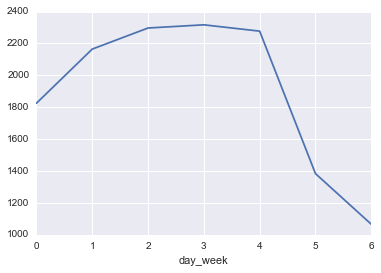

In [163]:
ridership_by_day.plot()

# Calculating Hourly Entries and Exits

In [164]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

Standardize each group

In [165]:
def standardize(xs):
    return (xs - xs.mean()) / xs.std()

grouped_data = example_df.groupby('even')
print grouped_data['value'].apply(standardize)

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
dtype: float64


Find second largest value in each group

In [167]:
def second_largest(xs):
    sorted_xs = xs.sort_values(inplace=False, ascending=False)
    return sorted_xs.iloc[1]

grouped_data = example_df.groupby('even')
print grouped_data['value'].apply(second_largest)

even
False    1
True     4
Name: value, dtype: int64


In [168]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [174]:
ridership_df.head()

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051


You can't just apply the `hourly_for_group` function to the `ridership_df` DataFrame:

In [176]:
try:
    ridership_df.groupby('UNIT').apply(hourly_for_group)
except TypeError as e:
    print 'Error: ', e

Error:  unsupported operand type(s) for -: 'str' and 'str'


It's trying to add the `UNIT` and `TIMEn` columns which are comprised of strings.

If you select just the `ENTRIESn` and `EXITSn` columns first, then the function will work:

In [179]:
ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23,8
3,14,8
4,18,18
5,29,205
6,71,54
7,132,593
8,170,44


Fill in this function to take a DataFrame with cumulative entries and exits and return a DataFrame with hourly entries and exits. The hourly entries and exits should be calculated separately for each station (the 'UNIT' column).
    
Hint: Take a look at the `get_hourly_entries_and_exits()` function you wrote in a previous quiz, DataFrame Vectorized Operations. If you copy it here and rename it, you can use it and the `.apply()` function to help solve this problem.

In [184]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [185]:
def get_hourly_entries_and_exits(entries_and_exits):
    return entries_and_exits.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)

In [186]:
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23,8
3,14,8
4,18,18
5,29,205
6,71,54
7,132,593
8,170,44


# Combining Pandas DataFrames

In [187]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

In [188]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

Fill in this function to take 2 DataFrames, one with subway data and one with weather data, and return a single dataframe with one row for each date, hour, and location. Only include times and locations that have both subway data and weather data available.

In [190]:
def combine_dfs(subway_df, weather_df):
    return subway_df.merge(weather_df, on=['DATEn', 'hour', 'latitude', 'longitude'], how='inner')

combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


If the two DataFrames don't have the same columns, you can specify the `left_on` and `right_on` values:

In [191]:
subway_df.merge(weather_df, 
               left_on=['DATEn', 'hour', 'latitude', 'longitude'],
               right_on=['DATEn', 'hour', 'latitude', 'longitude'],
            how='inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


# Plotting for DataFrames

In [192]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

Using `groupby()` without `as_index`:

In [199]:
first_even = example_df.groupby('even').first()
print first_even
print ''

# Causes an error. 'even' is no longer a column in the DataFrame
try:
    print first_even['even'] 
except KeyError as e:
    print 'Key Error: ', e

      above_three  value
even                    
False       False      1
True        False      2

Key Error:  'even'


In [200]:
first_even = example_df.groupby('even', as_index=False).first()
print first_even
print first_even['even'] # Now 'even' is still a column in the DataFrame

    even above_three  value
0  False       False      1
1   True       False      2
0    False
1     True
Name: even, dtype: bool


Make a plot of your choice here showing something interesting about the subway data:

In [201]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [204]:
data_by_location = subway_df.groupby(['latitude', 'longitude']).mean()
data_by_location.head()

,,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
latitude,longitude,,,,,,,,,,,,,,,,,,,
40.576152,-73.975925,9659049.284153,8641132.316940,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,0.006284,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
40.576298,-73.968523,8306897.075676,6646822.740541,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,0.006216,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
40.577961,-73.961806,45529095.112903,46124075.795699,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,0.006183,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
40.589547,-73.974295,7268213.576471,7961334.500000,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,0.006118,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
40.590867,-73.797011,6477944.768293,5994957.432927,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,0.002744,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In the `data_by_location` DataFrame, the columns `latitude` and `longitude` have been transformed into the row indexes.

You can prevent this by passing the `as_index` argument:

In [207]:
data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
data_by_location.head()

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9659049.284153,8641132.316940,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,...,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8306897.075676,6646822.740541,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,...,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,45529095.112903,46124075.795699,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,...,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
3,40.589547,-73.974295,7268213.576471,7961334.500000,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,...,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
4,40.590867,-73.797011,6477944.768293,5994957.432927,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,...,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

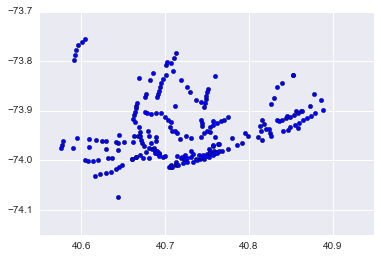

In [209]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'])

You can use the `s` argument to the `scatter()` function to control the bubble size:

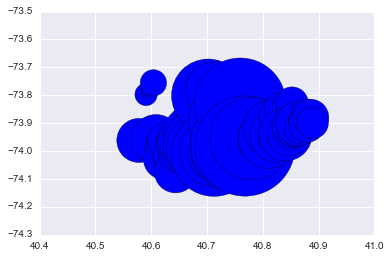

In [211]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=data_by_location['ENTRIESn_hourly'])

We are going to create a `scaled_entries` series that is the standardized value of the hourly entries:

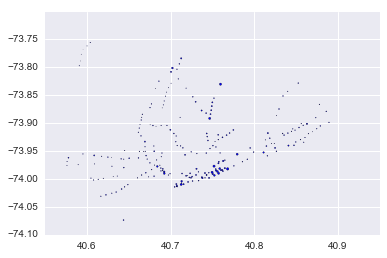

In [213]:
scaled_entries = data_by_location['ENTRIESn_hourly'] / data_by_location['ENTRIESn_hourly'].std()
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=scaled_entries)